### Importing

In [66]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
import os
import warnings
sys.path.append(os.path.abspath(os.path.join('..'))) # Adding racine path of project to sys.path
from src.preprocessing import *
from src.visualization import *
warnings.filterwarnings('ignore')

In [67]:
df1 = loading_dataset('../data/benin-malanville.csv')
df2 = loading_dataset('../data/sierraleone-bumbuna.csv')
df3 = loading_dataset('../data/togo-dapaong_qc.csv')

df = pd.concat([df1, df2, df3])
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1576800 entries, 2021-08-09 00:01:00 to 2022-10-25 00:00:00
Data columns (total 19 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   GHI            1576800 non-null  float64
 1   DNI            1576800 non-null  float64
 2   DHI            1576800 non-null  float64
 3   ModA           1576800 non-null  float64
 4   ModB           1576800 non-null  float64
 5   Tamb           1576800 non-null  float64
 6   RH             1576800 non-null  float64
 7   WS             1576800 non-null  float64
 8   WSgust         1576800 non-null  float64
 9   WSstdev        1576800 non-null  float64
 10  WD             1576800 non-null  float64
 11  WDstdev        1576800 non-null  float64
 12  BP             1576800 non-null  int64  
 13  Cleaning       1576800 non-null  int64  
 14  Precipitation  1576800 non-null  float64
 15  TModA          1576800 non-null  float64
 16  TModB          157680

GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
Timestamp                                                                 
2022-03-29 07:11:00   34.5   -0.3   33.7   33.2   28.3  22.9  23.2  0.8   
2022-02-16 17:50:00  151.0  193.0   99.8  138.2  120.8  37.3   9.5  1.6   
2021-11-18 10:06:00  641.0  570.0  245.4  704.7  695.1  29.6  48.8  1.5   
2022-02-26 23:39:00   -6.1   -1.0   -7.6    0.0    0.0  22.8  31.8  0.7   
2022-06-23 02:04:00   -1.5   -0.3   -1.4    0.0    0.0  26.7  86.9  0.5   

                     WSgust  WSstdev     WD  WDstdev   BP  Cleaning  \
Timestamp                                                             
2022-03-29 07:11:00     1.1      0.5   98.3      3.5  993         0   
2022-02-16 17:50:00     2.1      0.5  120.8      8.4  990         0   
2021-11-18 10:06:00     2.1      0.4  140.4     15.1  996         0   
2022-02-26 23:39:00     1.1      0.5   36.7      0.0  994         0   
2022-06-23 02:04:00     0.7      0.5   81.5      0.1  995         0   

                     Precipitation  TModA  TModB  Comments Country  
Timestamp                                                           
2022-03-29 07:11:00            0.0   22.0   20.4       NaN   Benin  
2022-02-16 17:50:00            0.0   39.3   37.9       NaN   Benin  
2021-11-18 10:06:00            0.0   62.5   54.4       NaN   Benin  
2022-02-26 23:39:00            0.0   19.9   19.1       NaN   Benin  
2022-06-23 02:04:00            0.0   26.0   25.7       NaN   Benin

### Summary statistics

In [68]:
df.describe()

GHI           DNI           DHI          ModA          ModB  \
count  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06   
mean   2.243573e+02  1.449408e+02  1.151746e+02  2.231257e+02  2.155223e+02   
std    3.181073e+02  2.453781e+02  1.580602e+02  3.154732e+02  3.049439e+02   
min   -1.950000e+01 -7.800000e+00 -1.790000e+01  0.000000e+00  0.000000e+00   
25%   -2.200000e+00 -2.000000e-01 -1.400000e+00  0.000000e+00  0.000000e+00   
50%    1.200000e+00  0.000000e+00  1.400000e+00  4.100000e+00  4.000000e+00   
75%    4.244000e+02  2.270000e+02  2.190000e+02  4.111000e+02  3.973000e+02   
max    1.499000e+03  1.004500e+03  8.920000e+02  1.507000e+03  1.473000e+03   

               Tamb            RH            WS        WSgust       WSstdev  \
count  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06   
mean   2.741696e+01  6.298333e+01  1.878440e+00  2.576763e+00  4.649840e-01   
std    5.131024e+00  2.854366e+01  1.536357e+00  1.961275e+00  2.904002e-01   
min    1.100000e+01  2.100000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.370000e+01  3.860000e+01  6.000000e-01  1.100000e+00  4.000000e-01   
50%    2.680000e+01  6.900000e+01  1.800000e+00  2.400000e+00  5.000000e-01   
75%    3.100000e+01  8.860000e+01  2.800000e+00  3.600000e+00  6.000000e-01   
max    4.380000e+01  1.000000e+02  1.950000e+01  2.660000e+01  4.700000e+00   

                 WD       WDstdev            BP      Cleaning  Precipitation  \
count  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06   1.576800e+06   
mean   1.494072e+02  8.771398e+00  9.899963e+02  8.079655e-04   2.697615e-03   
std    1.039399e+02  6.790689e+00  1.046797e+01  2.841326e-02   3.803610e-02   
min    0.000000e+00  0.000000e+00  9.680000e+02  0.000000e+00   0.000000e+00   
25%    5.330000e+01  2.900000e+00  9.770000e+02  0.000000e+00   0.000000e+00   
50%    1.803000e+02  9.000000e+00  9.940000e+02  0.000000e+00   0.000000e+00   
75%    2.342000e+02  1.290000e+01  9.990000e+02  0.000000e+00   0.000000e+00   
max    3.600000e+02  9.940000e+01  1.006000e+03  1.000000e+00   2.500000e+00   

              TModA         TModB  Comments  
count  1.576800e+06  1.576800e+06       0.0  
mean   3.339823e+01  3.286939e+01       NaN  
std    1.290953e+01  1.238889e+01       NaN  
min    9.000000e+00  8.100000e+00       NaN  
25%    2.370000e+01  2.370000e+01       NaN  
50%    2.830000e+01  2.800000e+01       NaN  
75%    4.260000e+01  4.190000e+01       NaN  
max    8.100000e+01  9.460000e+01       NaN

In [69]:
#plt.figure(figsize=(14,35))
#for i, col in enumerate(df.select_dtypes("number").columns,1):
    #plt.subplot(9,2,i)
    #sns.histplot(df[col])

This picture caracterize the distribution for each quantitave variable. We notice a big variation within variables and no one of distributions is gaussian.

### Checking of missing values / outliers / incorrect entries

In [70]:
l1 = ['GHI', 'DNI','DHI']
l2 = ['ModA', 'ModB','WS', 'WSgust']

In [71]:
# Checking of missing values / outliers / incorrect entries for elements of l1

# Missing values
for col in l1:
    print(missing_values(df,col)[0])

# No missing values for these columns

0
0
0


In [72]:
# Outliers
for col in l1:
    print(col,len(outliers(df, col))) # It displays the number of outliers for the column

GHI 7589
DNI 175340
DHI 20621


In [73]:
# Negative values
for col in l1:
    print(col,len(neg_values(df, col)))

GHI 777367
DNI 542339
DHI 522310


By above checking, we notice that columns 'GHI', 'DNI','DHI' contains outliers values and incorrect entries.

In [74]:
# Checking of outliers
for col in l2:
    print(col,len(outliers(df, col)))

ModA 7841
ModB 10119
WS 15501
WSgust 30004


We notice that columns 'ModA', 'ModB','WS', 'WSgust' contains outliers values.

### Visualization

#### Time Series Analysis

In [75]:
l3 = ['GHI', 'DNI', 'DHI', 'Tamb']
l4 = list(df['Country'].unique())
l5 = ['2021','2022']

In [76]:
l5 = ['2021','2022']

In [77]:
#ben = df[df['Country']=='Benin'].agg(['mean', 'min', 'max'])
#sie = df[df['Country']=='Sierraleone'].agg(['mean', 'min', 'max'])
#tog = df[df['Country']=='Togo'].agg(['mean', 'min', 'max'])

#df['GHI'][df['Country']=='Benin']
#df['GHI'].resample('M').max().plot()

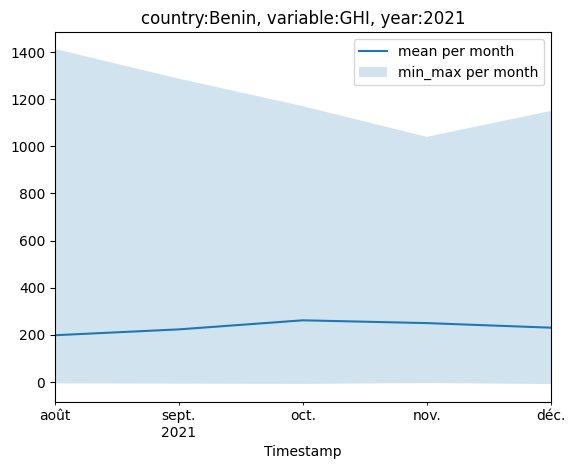

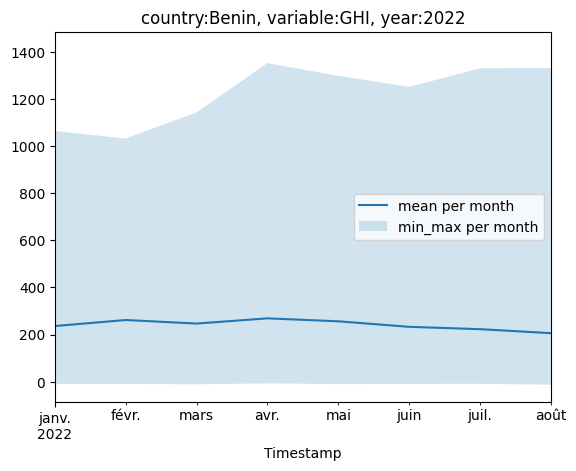

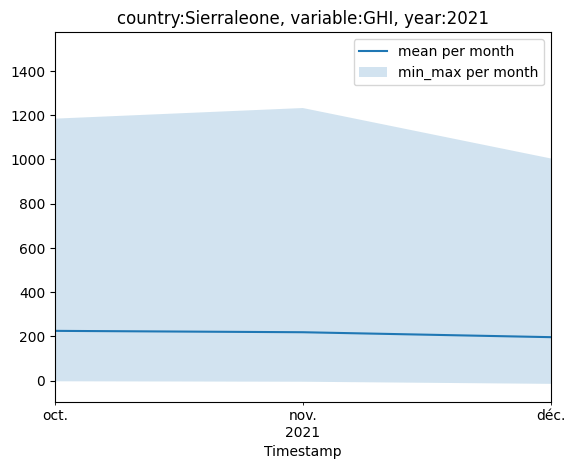

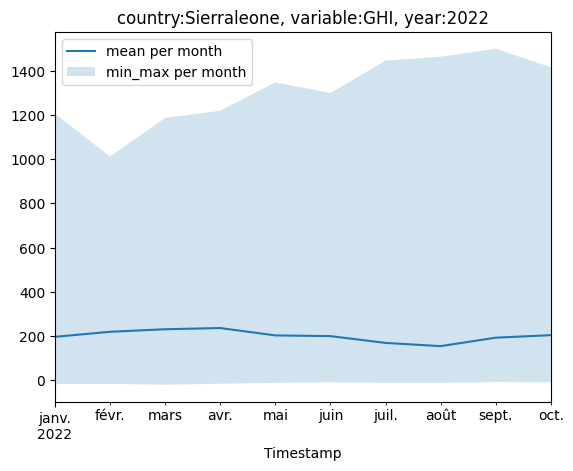

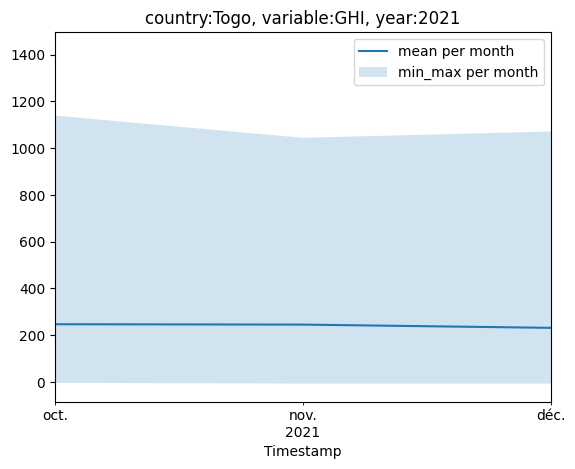

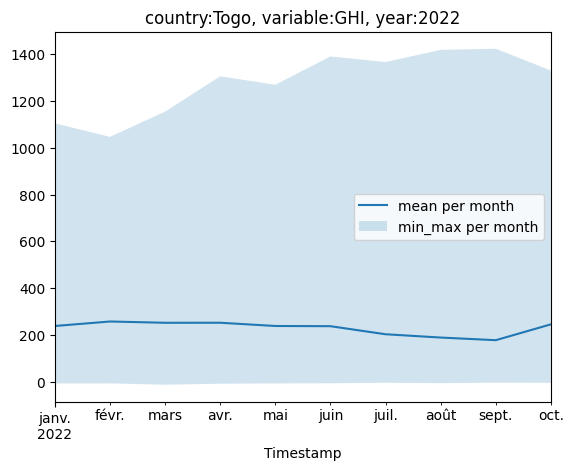

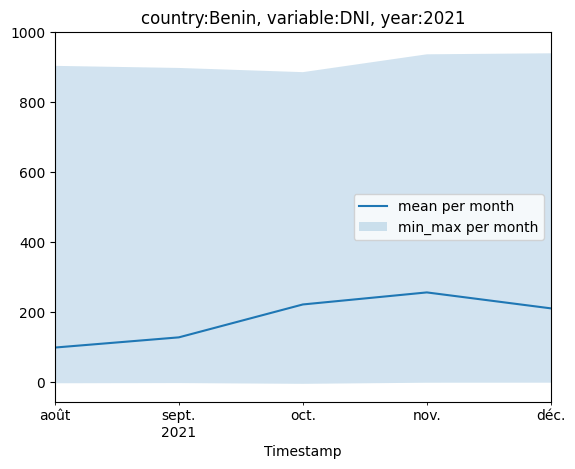

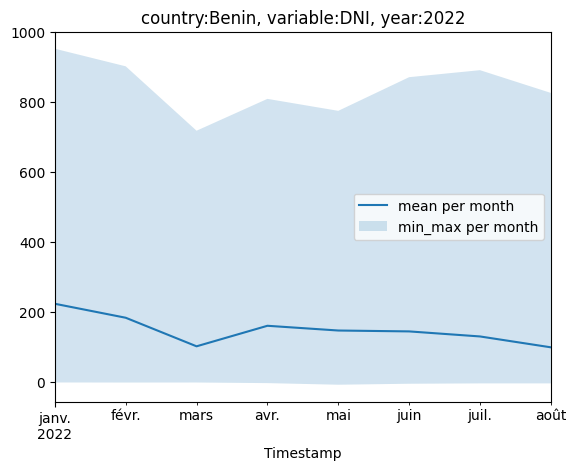

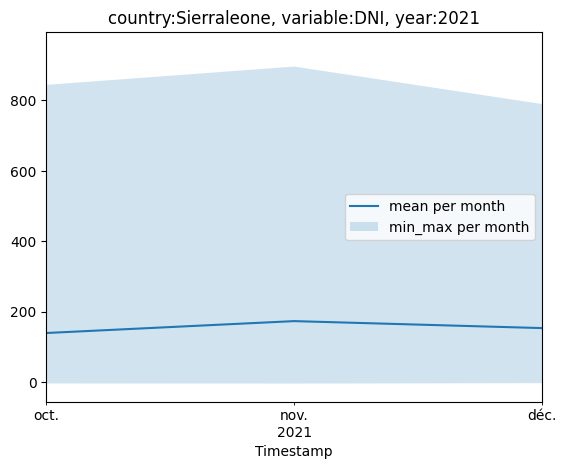

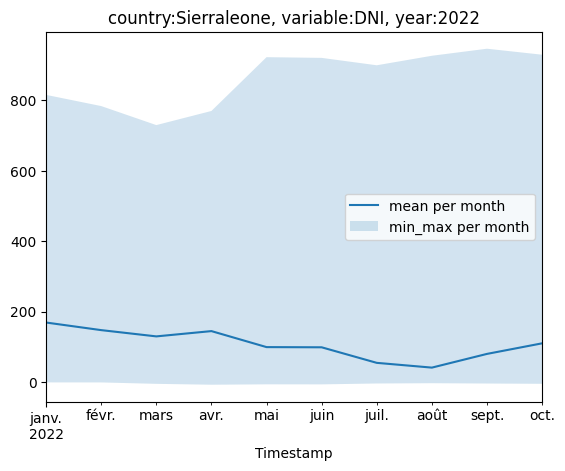

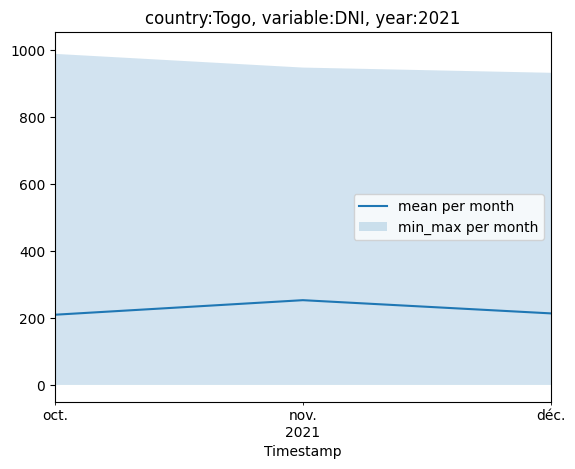

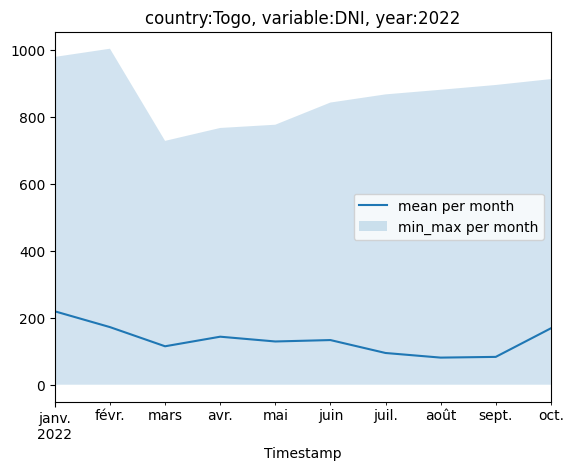

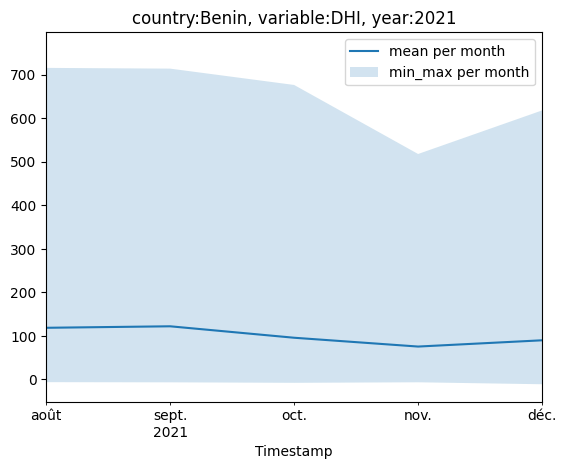

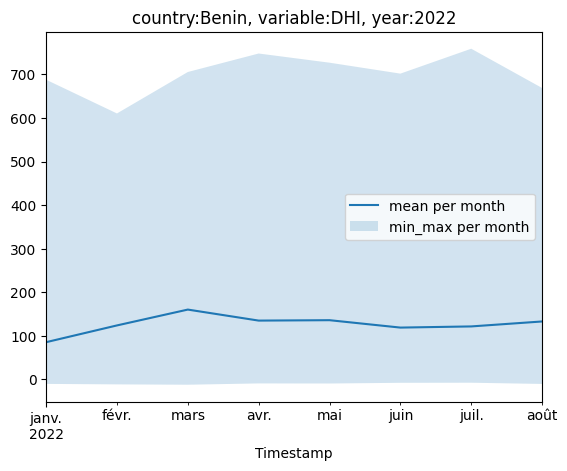

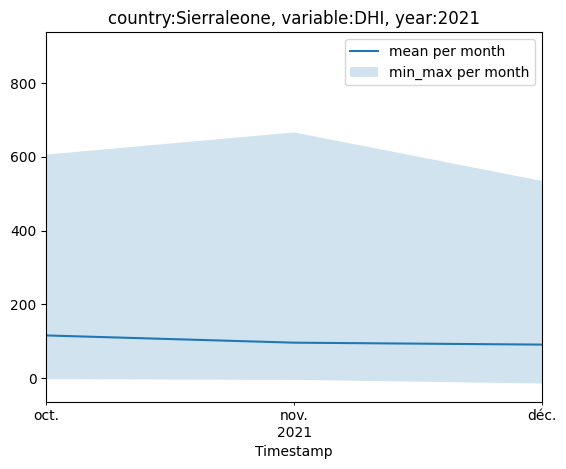

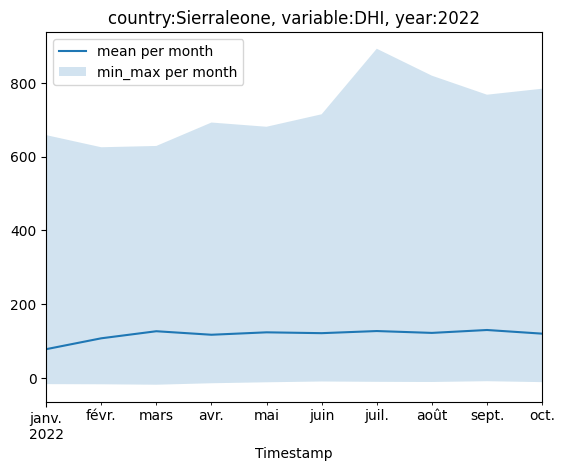

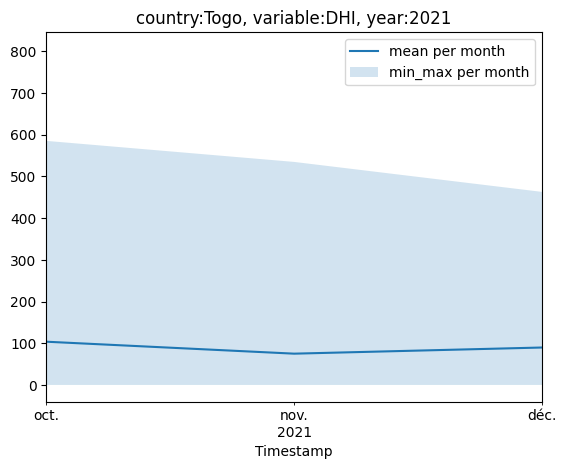

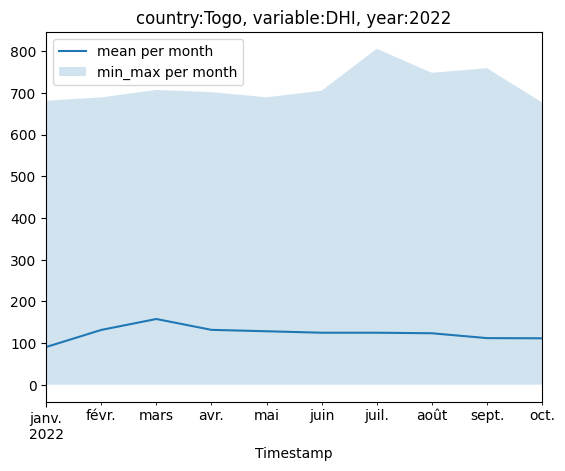

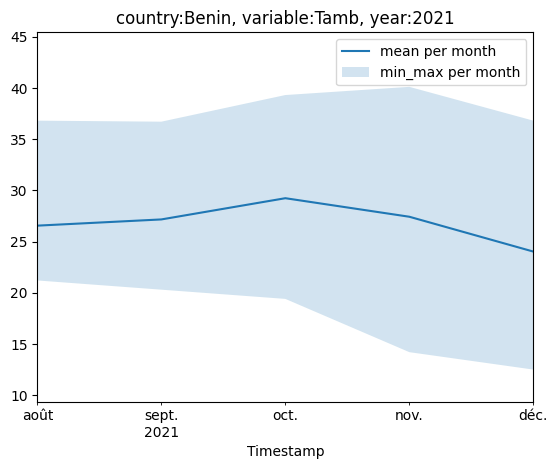

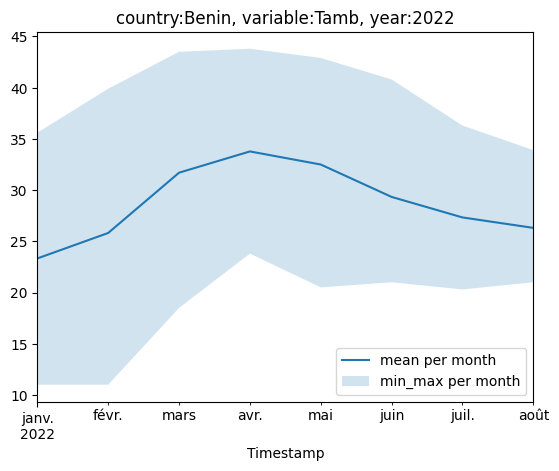

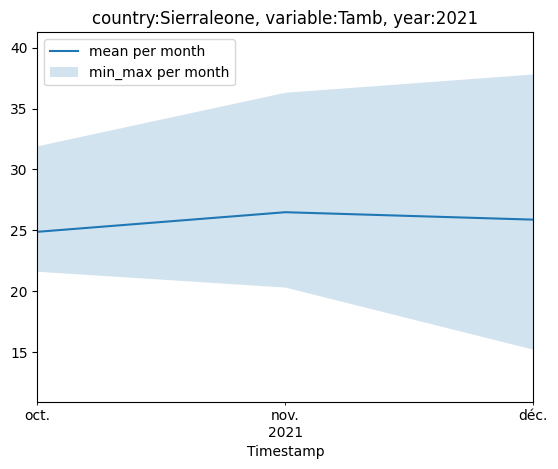

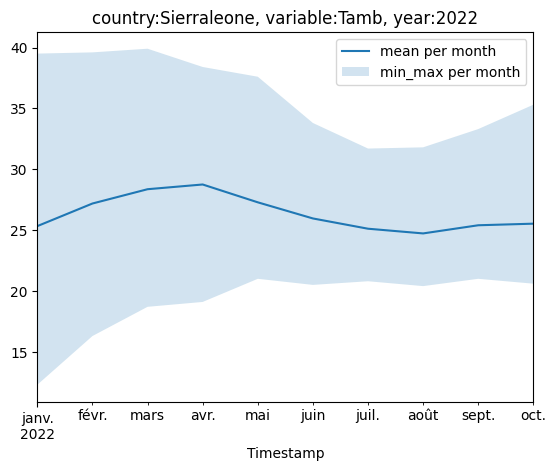

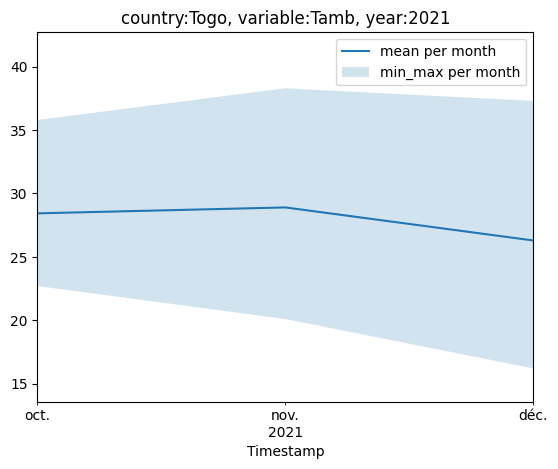

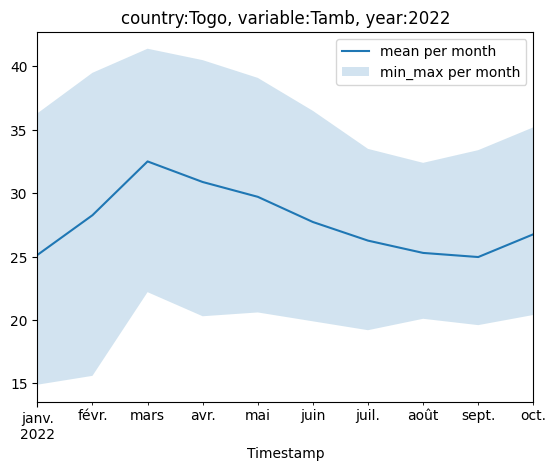

In [78]:
# Time series analysis: Pattern by month
for col in l3:
    for country in l4:
        for yr in l5: 
            trend_viz(df, col, country, 'M', yr)

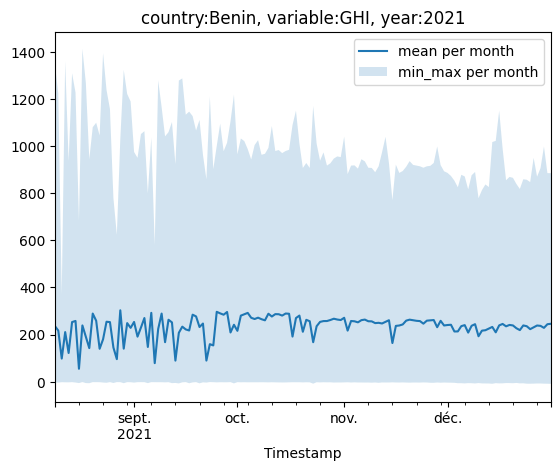

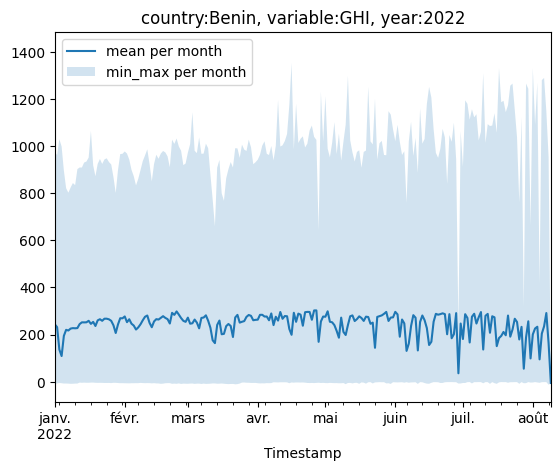

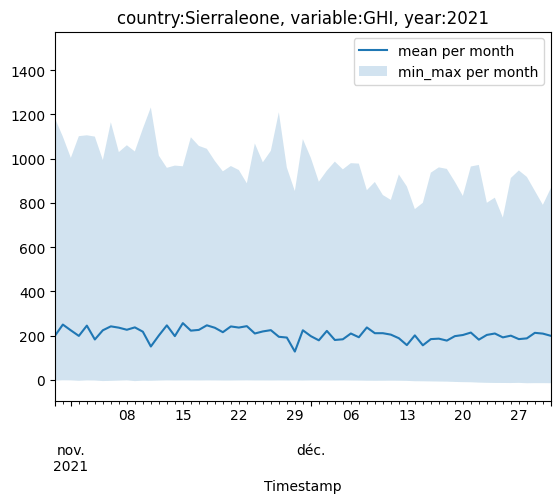

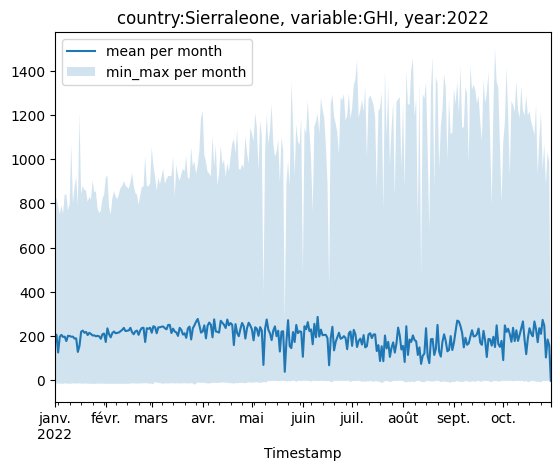

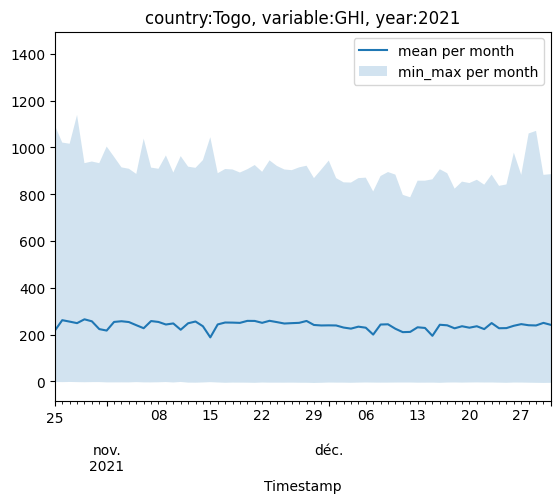

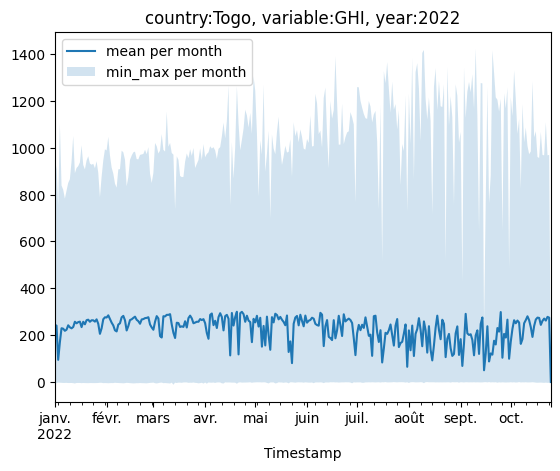

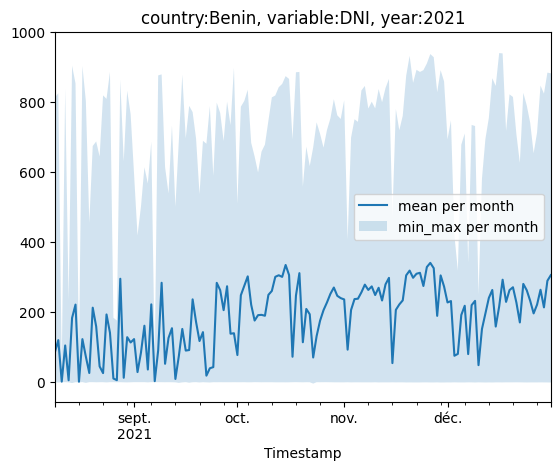

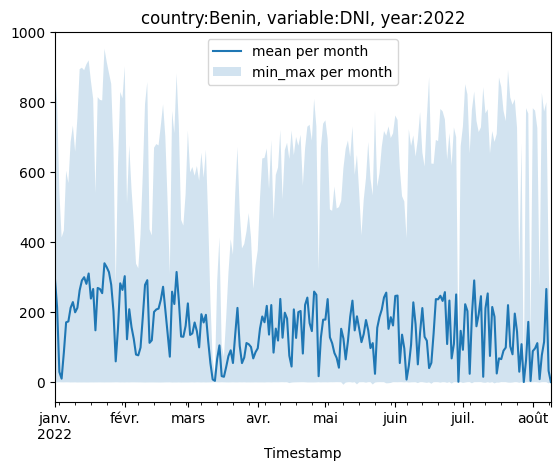

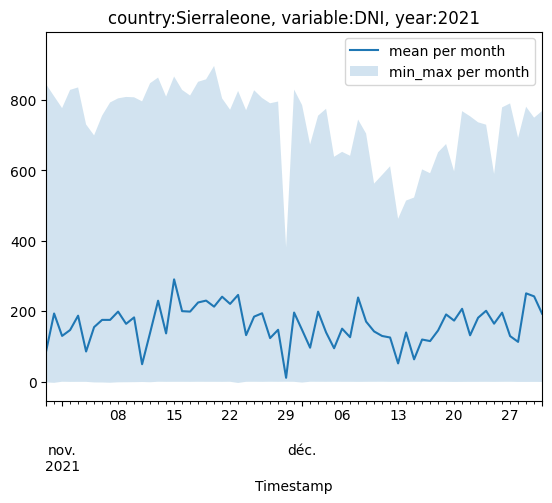

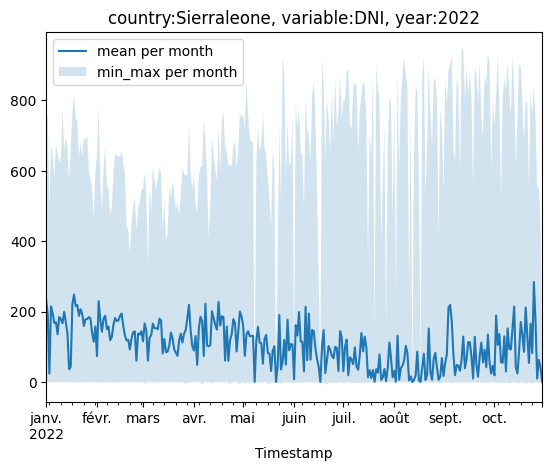

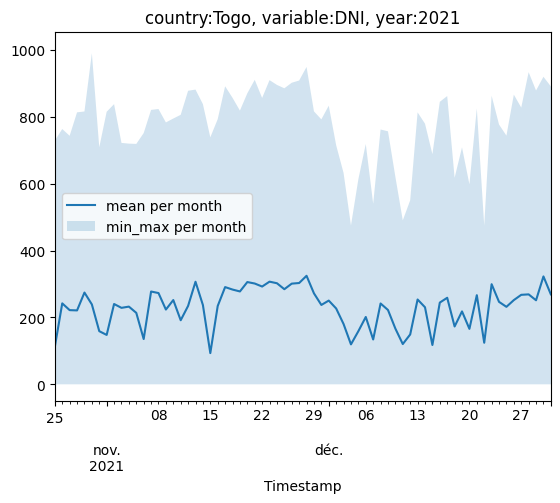

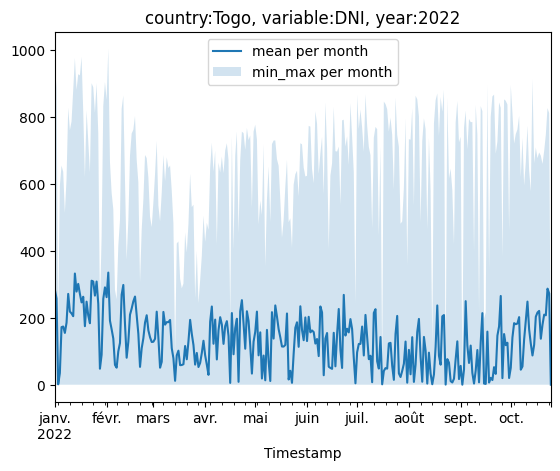

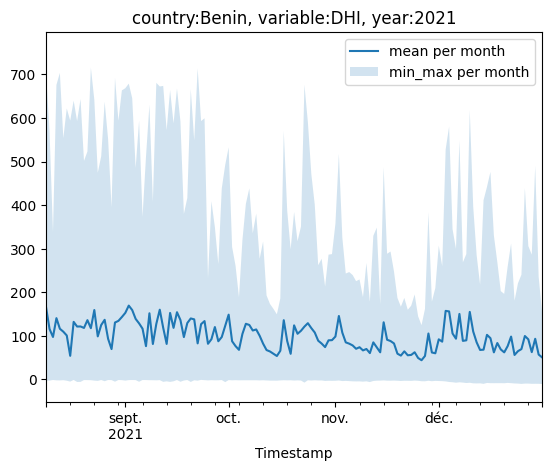

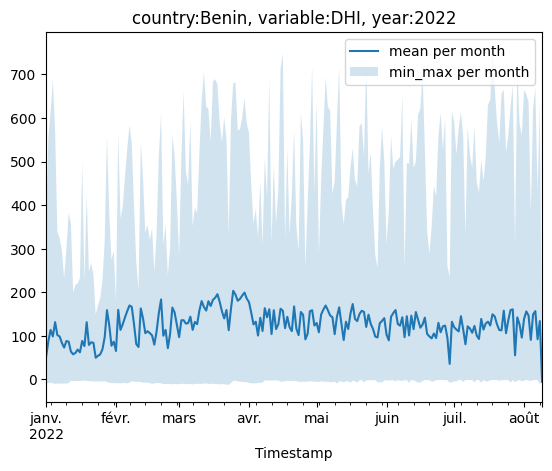

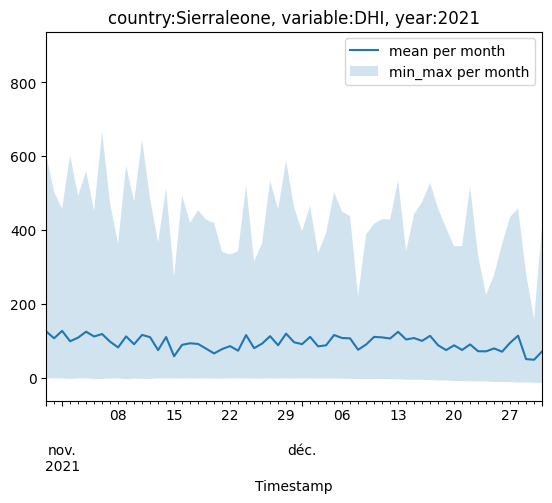

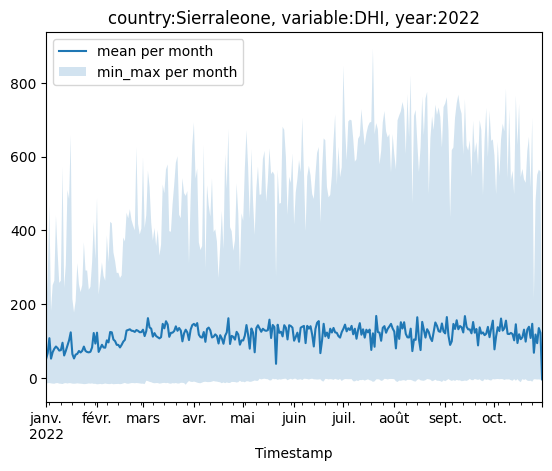

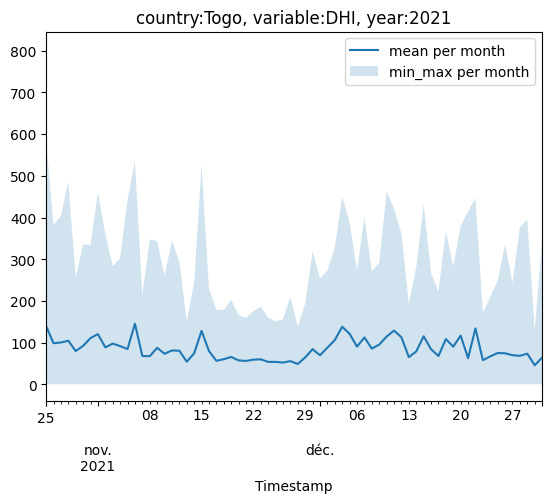

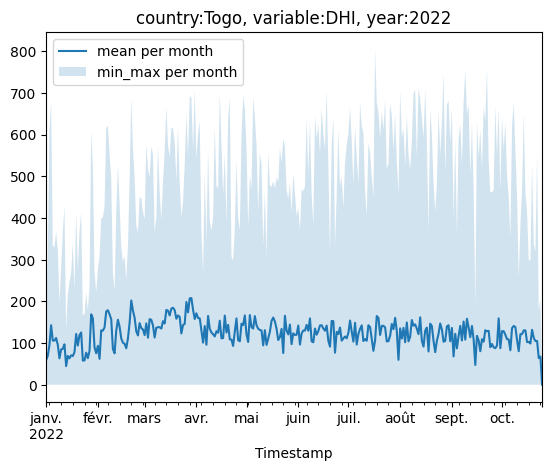

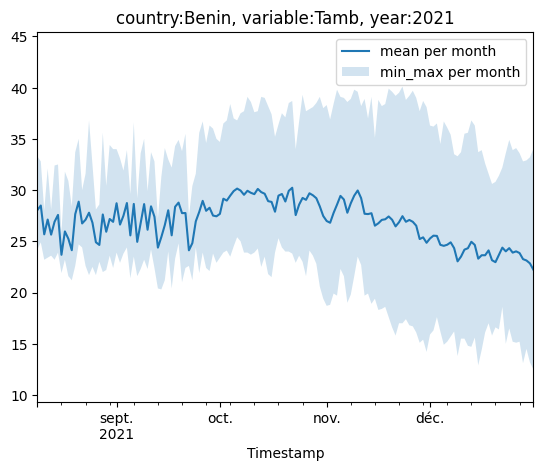

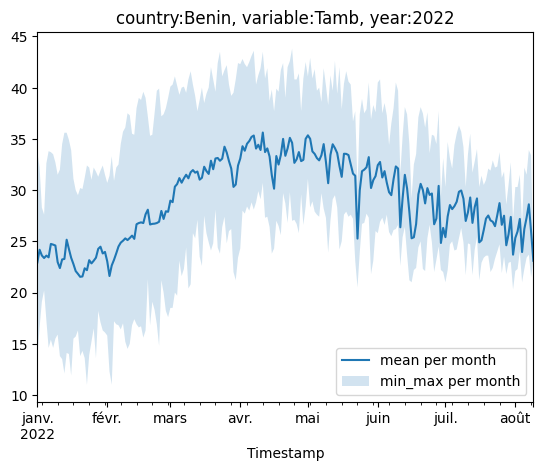

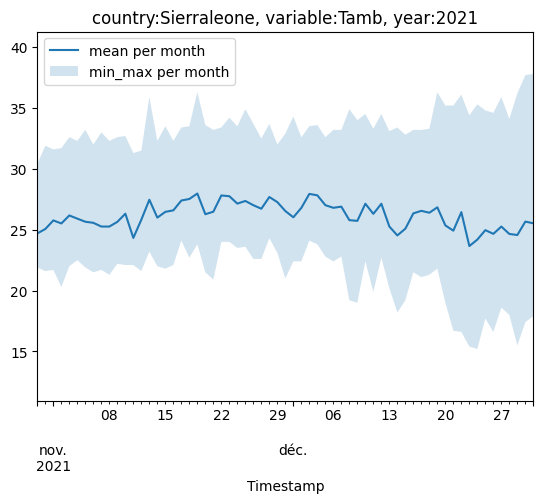

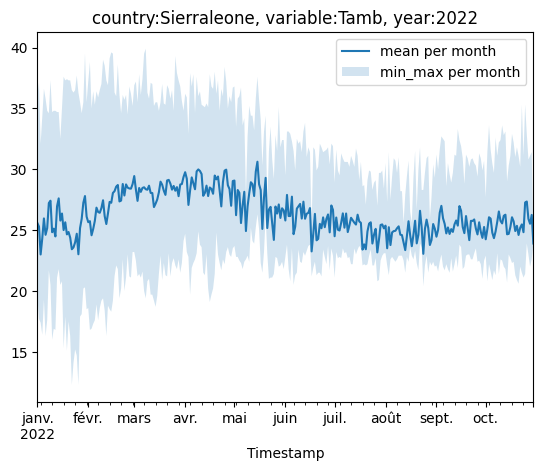

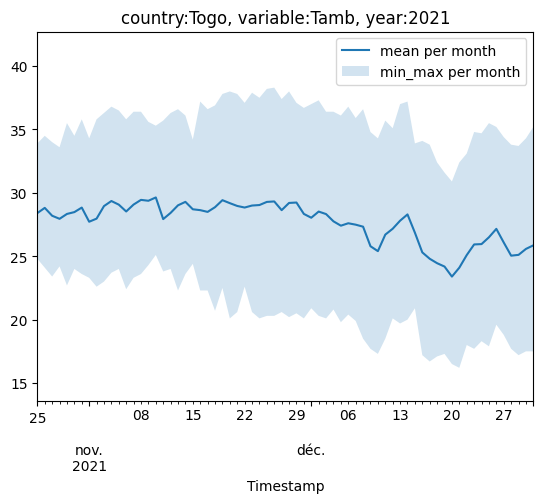

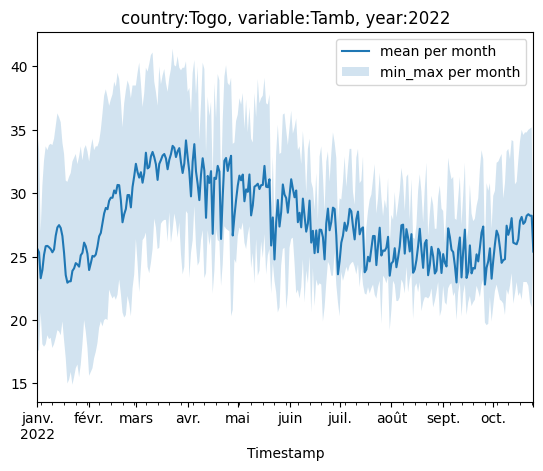

In [79]:
# Time series analysis: Pattern by day
for col in l3:
    for country in l4:
        for yr in l5: 
            trend_viz(df, col, country, 'D', yr)

### Impact of feature cleaning over sensor readings

In [80]:
cleaned_df = df[df['Cleaning']==1]
no_cleaned_df = df[df['Cleaning']==0]

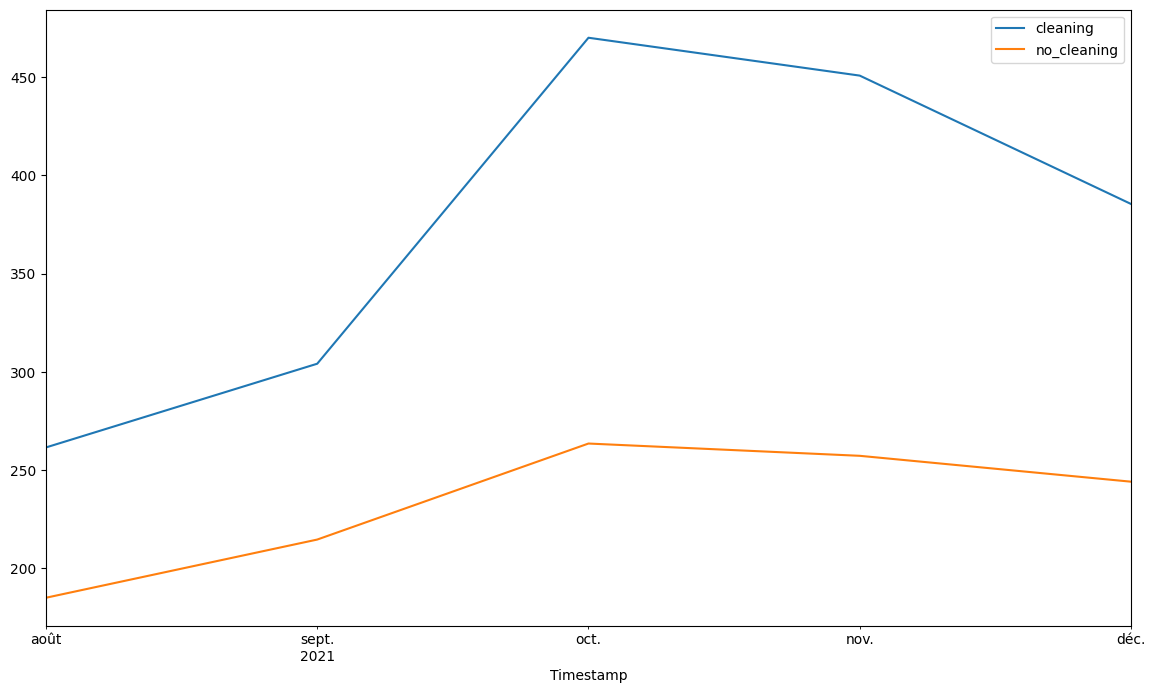

In [81]:
# Year 2021
plt.figure(figsize=(14,8))
cleaned_df['ModA']['2021'].resample('M').mean().plot(label='cleaning')
no_cleaned_df['ModA']['2021'].resample('M').mean().plot(label='no_cleaning')
plt.legend()

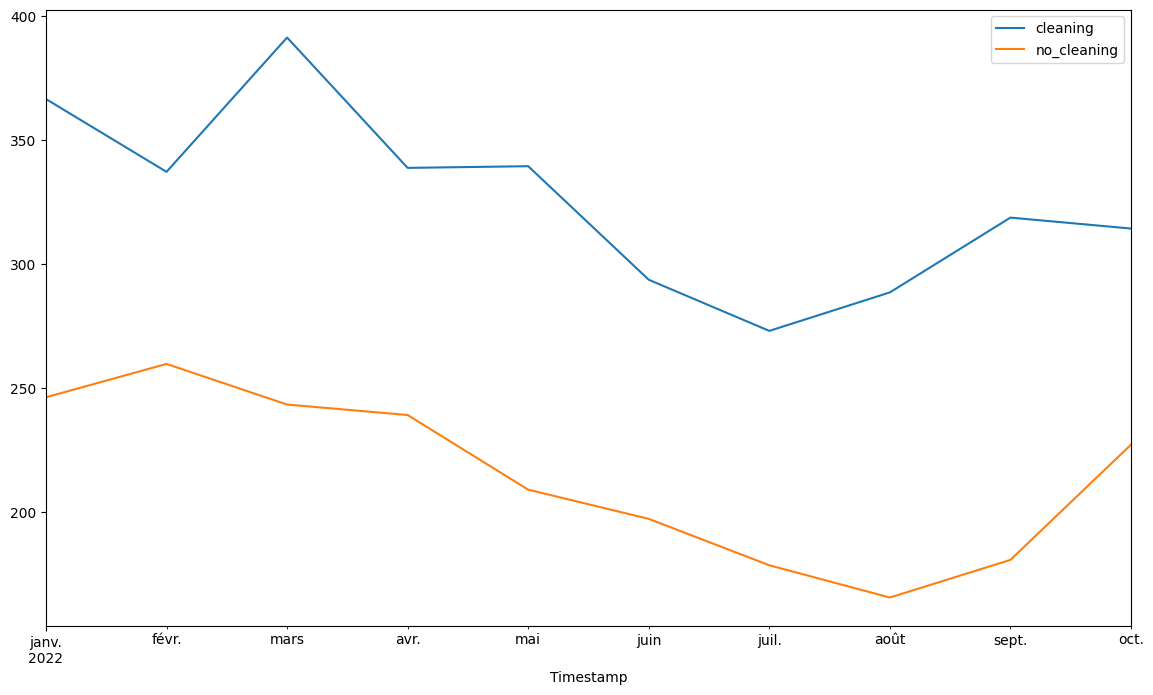

In [82]:
#Year 2022
plt.figure(figsize=(14,8))
cleaned_df['ModA']['2022'].resample('M').mean().plot(label='cleaning')
no_cleaned_df['ModA']['2022'].resample('M').mean().plot(label='no_cleaning')
plt.legend()

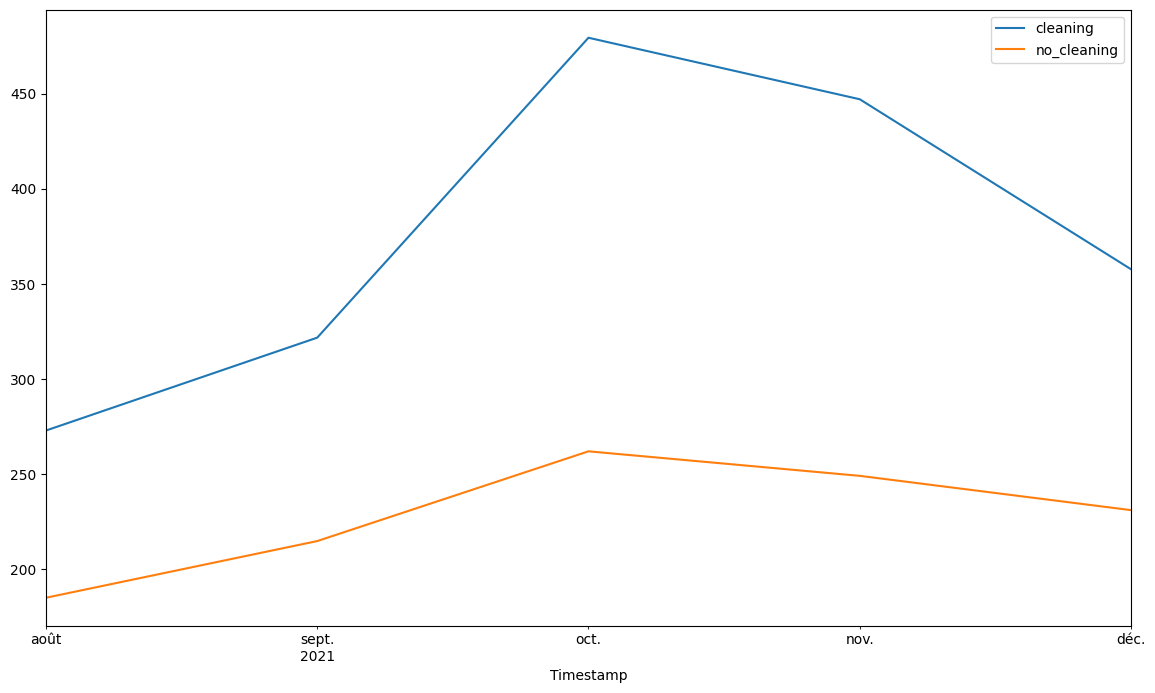

In [83]:
#Year 2021
plt.figure(figsize=(14,8))
cleaned_df['ModB']['2021'].resample('M').mean().plot(label='cleaning')
no_cleaned_df['ModB']['2021'].resample('M').mean().plot(label='no_cleaning')
plt.legend()

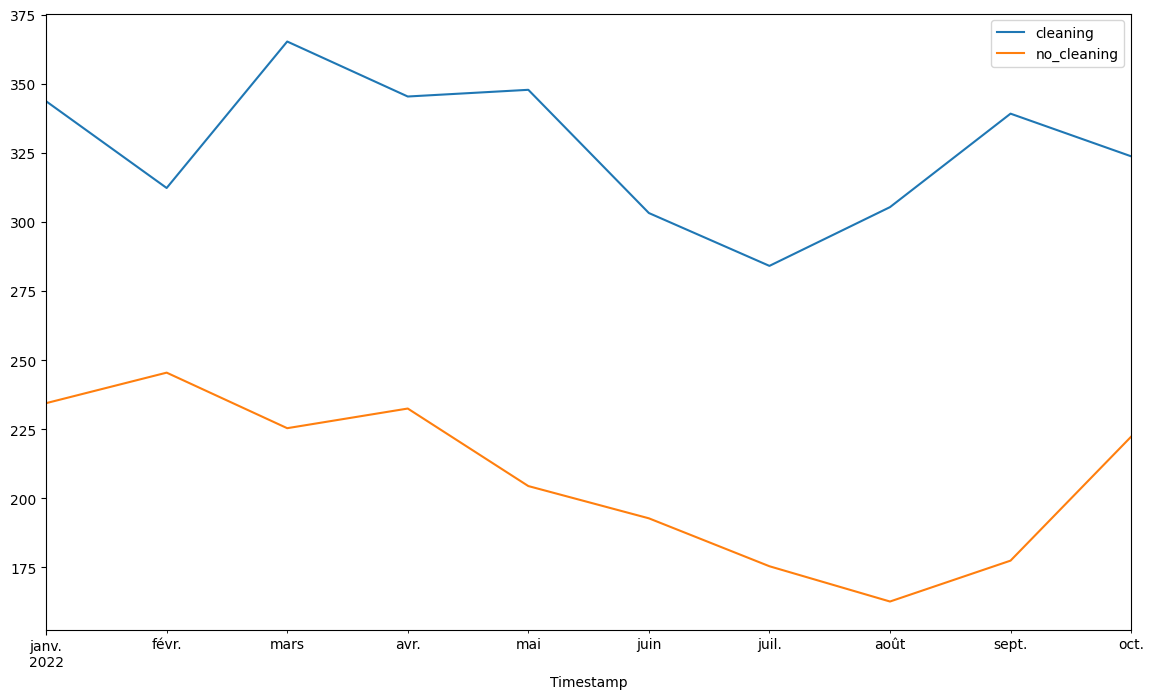

In [84]:
#Year 2022
plt.figure(figsize=(14,8))
cleaned_df['ModB']['2022'].resample('M').mean().plot(label='cleaning')
no_cleaned_df['ModB']['2022'].resample('M').mean().plot(label='no_cleaning')
plt.legend()

In [85]:
print('ModA_cleaned',cleaned_df['ModA'].describe())
print('\n')
print('ModA_no_cleaned', no_cleaned_df['ModA'].describe())

ModA_cleaned count    1274.000000
mean      343.983281
std       208.719722
min         0.000000
25%       188.525000
50%       305.350000
75%       455.575000
max      1086.000000
Name: ModA, dtype: float64


ModA_no_cleaned count    1.575526e+06
mean     2.230279e+02
std      3.155262e+02
min      0.000000e+00
25%      0.000000e+00
50%      4.000000e+00
75%      4.110000e+02
max      1.507000e+03
Name: ModA, dtype: float64


In [86]:
print('ModB_cleaned',cleaned_df['ModB'].describe())
print('\n')
print('ModB_no_cleaned', no_cleaned_df['ModB'].describe())

ModB_cleaned count    1274.000000
mean      342.889639
std       204.574001
min         0.000000
25%       188.600000
50%       299.000000
75%       446.200000
max      1068.000000
Name: ModB, dtype: float64


ModB_no_cleaned count    1.575526e+06
mean     2.154193e+02
std      3.049902e+02
min      0.000000e+00
25%      0.000000e+00
50%      3.800000e+00
75%      3.972000e+02
max      1.473000e+03
Name: ModB, dtype: float64


We notice that after cleaning, values for sensor readings A and B have increased

### Correlation analysis

In [87]:
l6 = ['TModA', 'TModB']

<Axes: >

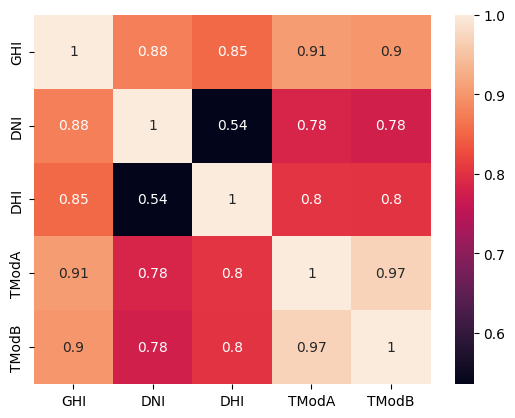

In [88]:
# correlations between solar radiation components (GHI, DNI, DHI) and temperature measures (TModA, TModB)
correlation = df[l1+l6].corr()
sns.heatmap(correlation, annot=True)

In [89]:
l7 = ['WS', 'WSgust', 'WD'] # Wind features

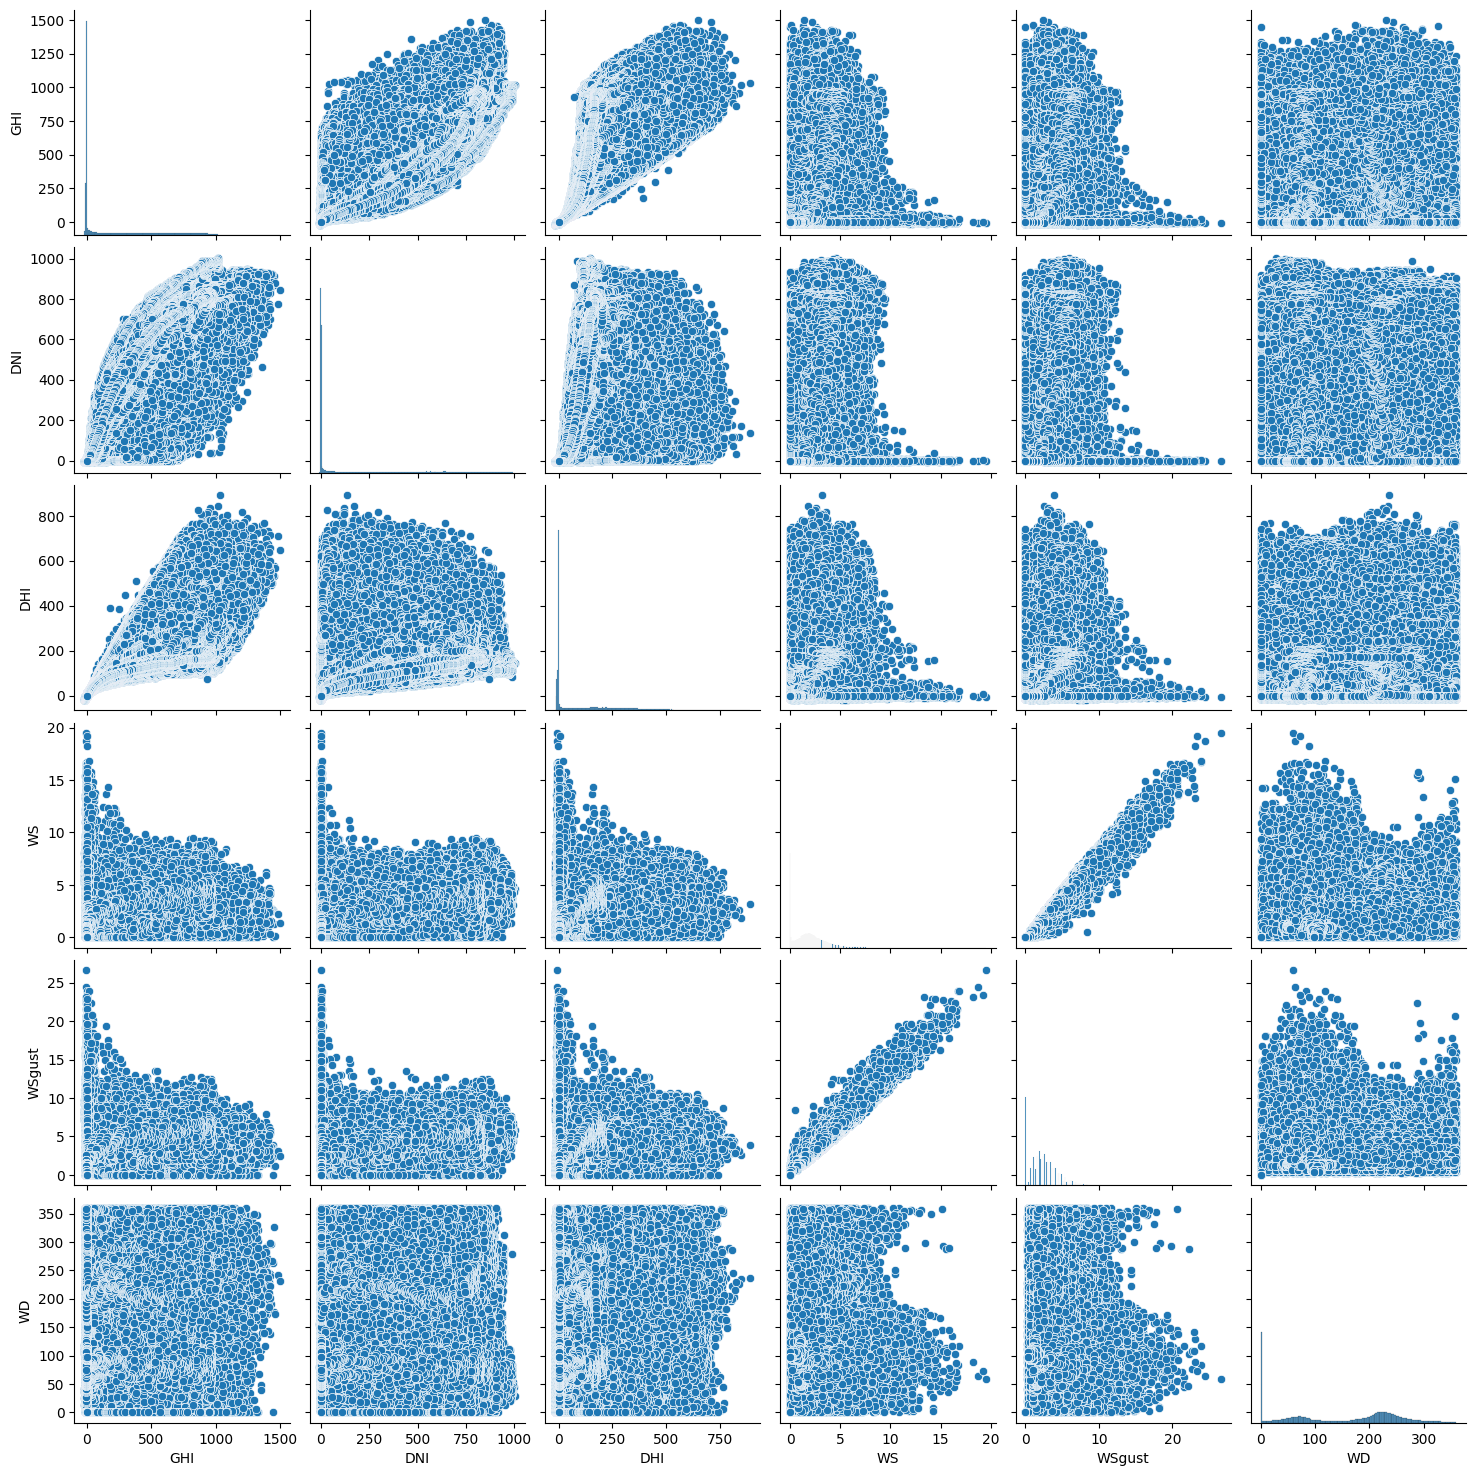

In [90]:
# relationship between wind conditions (WS, WSgust, WD) and solar irradiance using scatter matrices
sns.pairplot(df[l1 + l7])

### Temperature analysis

In [91]:
# Influence of relative humidity (RH) on temperature readings and solar radiation
df[l1 + ['Tamb']].corrwith(df['RH'])

GHI    -0.354140
DNI    -0.394256
DHI    -0.252118
Tamb   -0.506457
dtype: float64

We notice that relative humidity have a negative correlation with temperature readings and solar radiation. That's meaning that when relative humidity increases, theses measures decreases. What is normal.

### Histograms

In [92]:
l8 = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']

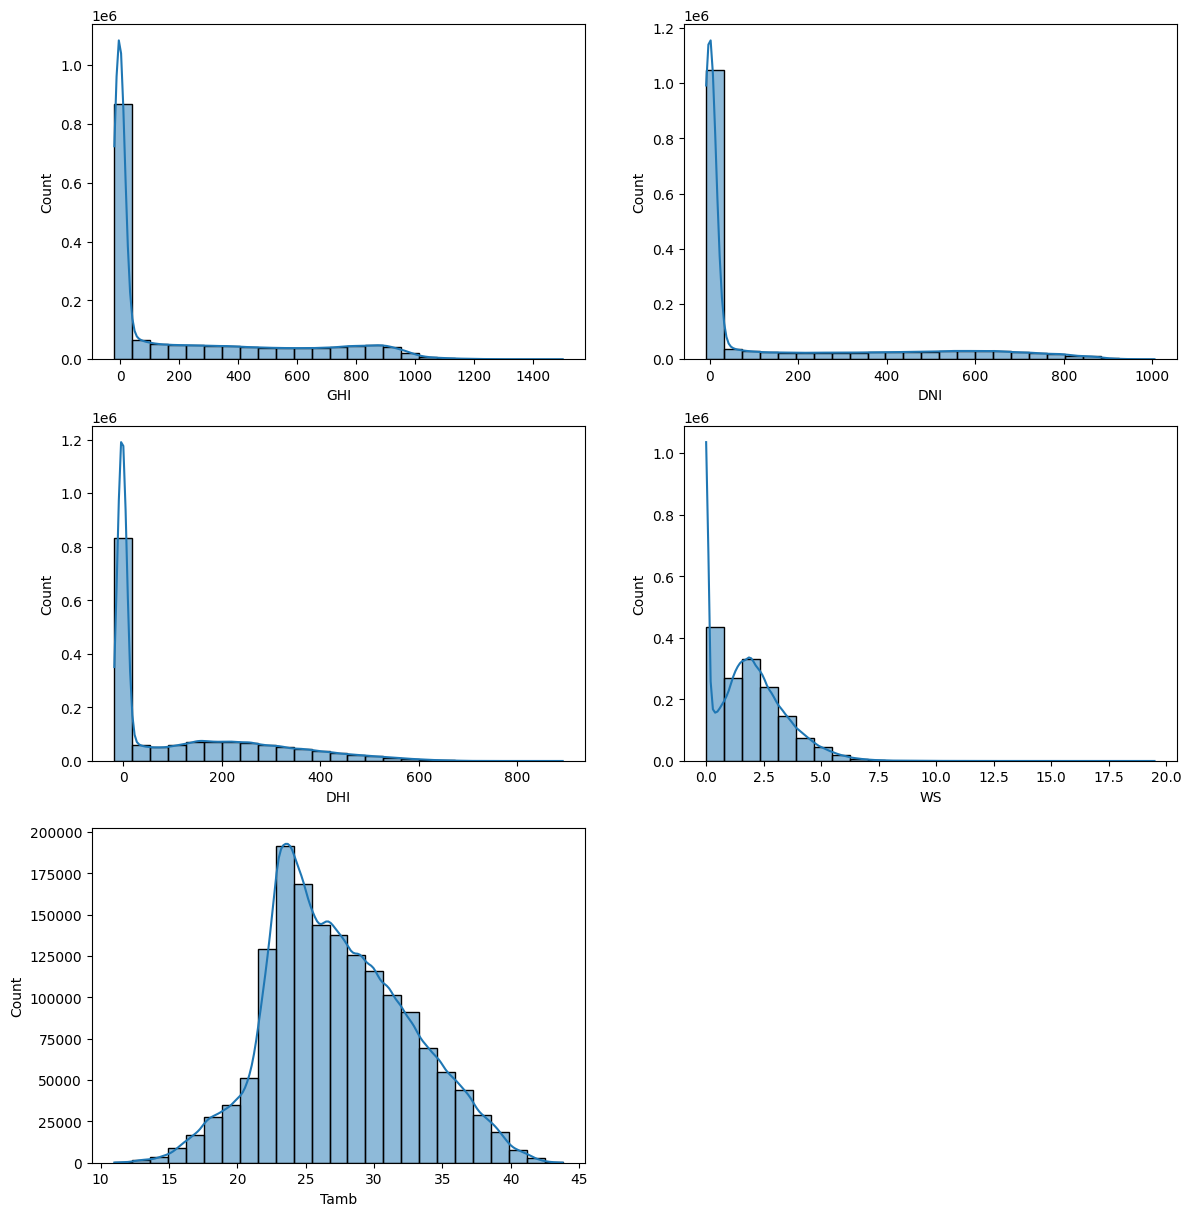

In [93]:
plt.figure(figsize=(14, 20))
for i, j in enumerate(l8, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[j], kde=True, bins=25)

### Z-score analysis

In [103]:
l9 = list(df.select_dtypes('number').columns)
l10 = [var for var in l9 if var not in ['WSstdev', 'WDstdev', 'Comments', 'WD', 'Cleaning']]

In [97]:
data = df.copy()

Z_score = (x_i - x_bar) / sigma
if |Z-score| > 3, then the value is an outlier for the distribution.

In [100]:
threshold = 3
for var in l10:
    data[f'z_{var}'] = (data[var] - data[var].mean()) / data[var].std()
    data[f'is_outlier{var}'] = data[f'z_{var}'].abs() > threshold


### Bubble charts

Text(0.5, 1.0, 'Bubble Chart: GHI vs. Tamb with Bubble Size Representing RH and Color Representing WS')

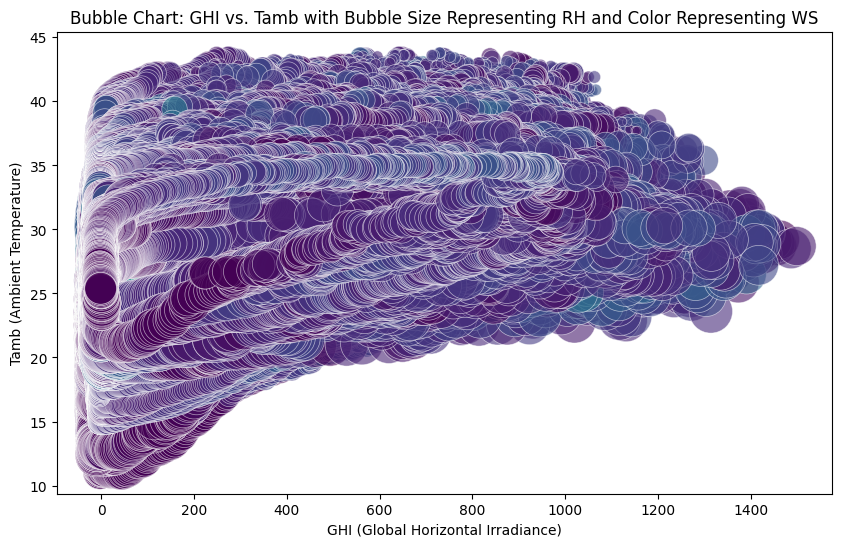

In [104]:
# Define the variables for the plot
x = df['GHI']
y = df['Tamb']
bubble_size = df['RH']  # Size of the bubbles represents Relative Humidity (RH)
color = df['WS']  # represent Wind Speed (WS)

# bubble chart
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, s=bubble_size*10, c=color, cmap='viridis', alpha=0.6, edgecolors='w', linewidth=0.5)

# Add labels and title
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('Bubble Chart: GHI vs. Tamb with Bubble Size Representing RH and Color Representing WS')

### Data Cleaning

In [106]:
# Checking of missing values for the entire dataset
for col in df.columns:
    print(col, missing_values(df, col)[0])

GHI 0
DNI 0
DHI 0
ModA 0
ModB 0
Tamb 0
RH 0
WS 0
WSgust 0
WSstdev 0
WD 0
WDstdev 0
BP 0
Cleaning 0
Precipitation 0
TModA 0
TModB 0
Comments 1576800
Country 0


In [107]:
# Remove column Comments
df.drop(columns='Comments', inplace=True)

In [109]:
for col in df.select_dtypes('number').columns:
    print(col,len(neg_values(df, col)))

GHI 777367
DNI 542339
DHI 522310
ModA 0
ModB 0
Tamb 0
RH 0
WS 0
WSgust 0
WSstdev 0
WD 0
WDstdev 0
BP 0
Cleaning 0
Precipitation 0
TModA 0
TModB 0


In [114]:
# Let's recover index of lines having anomalies (here negatives values for some features)
neg_index = {}
for col in df.select_dtypes('number').columns:
    neg_ind = neg_values(df, col).index
    neg_index[f'neg_ind{col}'] = neg_ind

print(neg_index)
    


{'neg_indGHI': DatetimeIndex(['2021-08-09 00:01:00', '2021-08-09 00:02:00',
               '2021-08-09 00:03:00', '2021-08-09 00:04:00',
               '2021-08-09 00:05:00', '2021-08-09 00:06:00',
               '2021-08-09 00:07:00', '2021-08-09 00:08:00',
               '2021-08-09 00:09:00', '2021-08-09 00:10:00',
               ...
               '2022-10-24 23:51:00', '2022-10-24 23:52:00',
               '2022-10-24 23:53:00', '2022-10-24 23:54:00',
               '2022-10-24 23:55:00', '2022-10-24 23:56:00',
               '2022-10-24 23:57:00', '2022-10-24 23:58:00',
               '2022-10-24 23:59:00', '2022-10-25 00:00:00'],
              dtype='datetime64[ns]', name='Timestamp', length=777367, freq=None), 'neg_indDNI': DatetimeIndex(['2021-08-09 00:01:00', '2021-08-09 00:02:00',
               '2021-08-09 00:03:00', '2021-08-09 00:04:00',
               '2021-08-09 00:05:00', '2021-08-09 00:06:00',
               '2021-08-09 00:07:00', '2021-08-09 00:08:00',
              

In [119]:
# Rmoving these lines
index_to_remove = set()

for ind in neg_index.values():
    index_to_remove.update(ind)

df = df.drop(index=index_to_remove)

In [120]:
df.shape

(685650, 18)